In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
import collections.abc
collections.Iterable = collections.abc.Iterable
from astrodendro import Dendrogram
from astrodendro import structure
import pandas as pd

In [2]:
cgs_mp = 9.10938291e-28
cgs_me = 9.10938291e-28 
cgs_xmh =  cgs_mp + cgs_me
yHe = 9.7222222e-2 
mu = (1.e0+4.e0*yHe)*cgs_xmh

In [3]:
def get_data(filename):
  d = {}
  with h5py.File(filename, "r") as data:
    data_list = list(data)
    for ls in data_list:
      d[ls] = data[ls][()]
  return d

In [6]:
d = get_data('C:/Users/kotor/StarGen/datasets/data_ppp/cb2800.h5')

hx = d['space1']
hy = d['space2']
hz = d['space3']

T = d['T']
Td = d['Td']

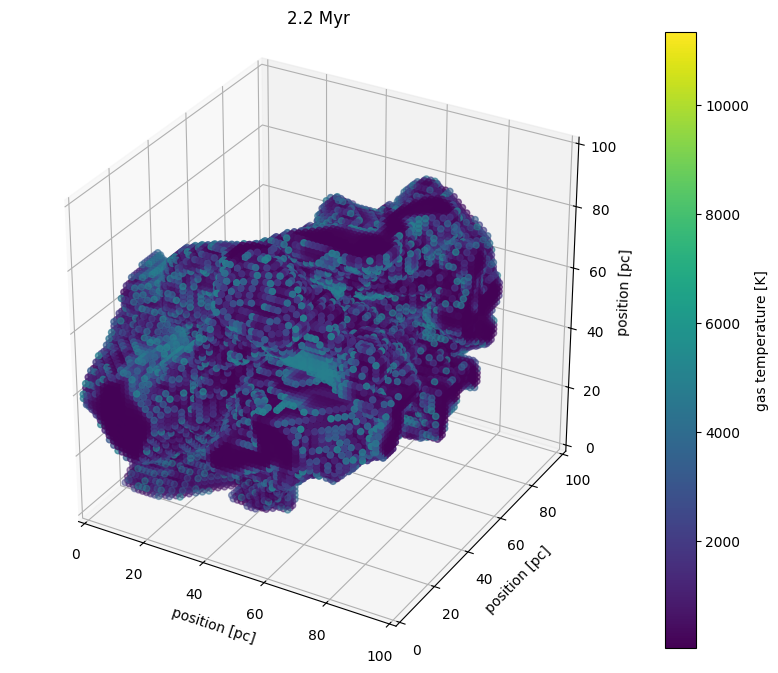

In [7]:
# make 3D map

shape = T.shape
gas_density = T.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_density.min(), gas_density.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * hx
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * hy
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * hz

threshold = 5000
mask= gas_density < threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_density[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('gas temperature [K]')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("3Dmap_400")